In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import Callback
from adamw_schedulefree import AdamWScheduleFree

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
class ChangeModeCallback(Callback):
    
    def __init__(self, steps_per_epoch):
        super(ChangeModeCallback, self).__init__()
        self.steps_per_epoch = steps_per_epoch
        
    def on_epoch_begin(self, epoch, logs=None):
        self.model.optimizer.set_in_train_mode(self.model.trainable_variables)
    
    def on_train_batch_end(self, batch, logs=None):
        if batch == self.steps_per_epoch - 1: 
            self.model.optimizer.set_in_eval_mode(self.model.trainable_variables)


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import Callback

def create_model(input_shape):
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

batch_size = 64
epochs = 15

(x_train, y_train), (x_test, y_test) = mnist.load_data()
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
    x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Cosine Decay for Learning Rate
steps_per_epoch = np.ceil(len(x_train) / batch_size)
decay_steps = (epochs-1) * steps_per_epoch
lr_schedule = tf.keras.optimizers.schedules.CosineDecay(initial_learning_rate=0.0, decay_steps=decay_steps, warmup_target=0.001, warmup_steps=steps_per_epoch)

model = create_model(input_shape)
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=Adam(learning_rate=lr_schedule),
              metrics=['accuracy'])

history1=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])





model = create_model(input_shape)
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=AdamWScheduleFree(warmup_steps=steps_per_epoch),
              metrics=['accuracy'])

steps_per_epoch = len(x_train) // batch_size


history2=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[ChangeModeCallback(steps_per_epoch=steps_per_epoch)])

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/15


2024-06-05 12:49:01.482033: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


938/938 [==============================] - 9s 5ms/step - loss: 0.5022 - accuracy: 0.8447 - val_loss: 0.0869 - val_accuracy: 0.9714
Epoch 2/15
938/938 [==============================] - 4s 5ms/step - loss: 0.1337 - accuracy: 0.9603 - val_loss: 0.0551 - val_accuracy: 0.9828
Epoch 3/15
938/938 [==============================] - 4s 5ms/step - loss: 0.1005 - accuracy: 0.9706 - val_loss: 0.0588 - val_accuracy: 0.9826
Epoch 4/15
938/938 [==============================] - 5s 5ms/step - loss: 0.0932 - accuracy: 0.9722 - val_loss: 0.0484 - val_accuracy: 0.9847
Epoch 5/15
938/938 [==============================] - 4s 5ms/step - loss: 0.0826 - accuracy: 0.9750 - val_loss: 0.0446 - val_accuracy: 0.9872
Epoch 6/15
938/938 [==============================] - 4s 5ms/step - loss: 0.0801 - accuracy: 0.9762 - val_loss: 0.0464 - val_accuracy: 0.9872
Epoch 7/15
938/938 [==============================] - 4s 5ms/step - loss: 0.0669 - accuracy: 0.9802 - val_loss: 0.0445 - val_accuracy: 0.9881
Epoch 8/15
938/93

2024-06-05 12:50:13.338848: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


938/938 [==============================] - 7s 5ms/step - loss: 0.5266 - accuracy: 0.8416 - val_loss: 0.0926 - val_accuracy: 0.9720
Epoch 2/15
938/938 [==============================] - 4s 5ms/step - loss: 0.1167 - accuracy: 0.9644 - val_loss: 0.0511 - val_accuracy: 0.9827
Epoch 3/15
938/938 [==============================] - 4s 5ms/step - loss: 0.0822 - accuracy: 0.9758 - val_loss: 0.0405 - val_accuracy: 0.9862
Epoch 4/15
938/938 [==============================] - 4s 5ms/step - loss: 0.0647 - accuracy: 0.9799 - val_loss: 0.0365 - val_accuracy: 0.9881
Epoch 5/15
938/938 [==============================] - 4s 5ms/step - loss: 0.0582 - accuracy: 0.9823 - val_loss: 0.0336 - val_accuracy: 0.9893
Epoch 6/15
938/938 [==============================] - 4s 5ms/step - loss: 0.0513 - accuracy: 0.9841 - val_loss: 0.0329 - val_accuracy: 0.9892
Epoch 7/15
938/938 [==============================] - 4s 5ms/step - loss: 0.0477 - accuracy: 0.9853 - val_loss: 0.0314 - val_accuracy: 0.9904
Epoch 8/15
938/93

In [12]:
import matplotlib.pyplot as plt

def compare_models(histories, labels):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_loss'], label=f'{label} Val Loss')
        plt.plot(history.history['loss'], label=f'{label} Train Loss', linestyle='--')
    plt.title('Comparison of Validation and Training Loss Across Models')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.ylim([0, 0.1])
    
    plt.subplot(1, 2, 2)
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_accuracy'], label=f'{label} Val Accuracy')
        plt.plot(history.history['accuracy'], label=f'{label} Train Accuracy', linestyle='--')
    plt.title('Comparison of Validation and Training Accuracy Across Models')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.ylim([0.95, 1])
    
    plt.show()

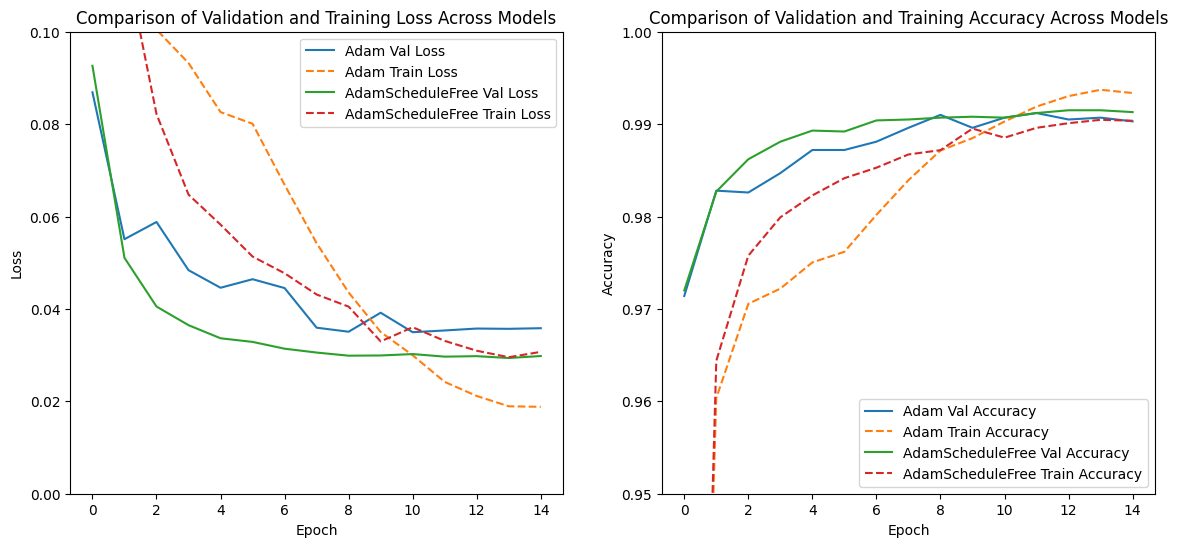

In [13]:
compare_models([history1, history2], ['Adam', 'AdamScheduleFree'])